<a href="https://colab.research.google.com/github/vasanth2809/ML-DL-NLP-LLM/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import statistics

In [ ]:
df=sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
np.mean(df['total_bill'])

np.float64(19.78594262295082)

In [ ]:
np.median(df['total_bill'])

np.float64(17.795)

In [ ]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

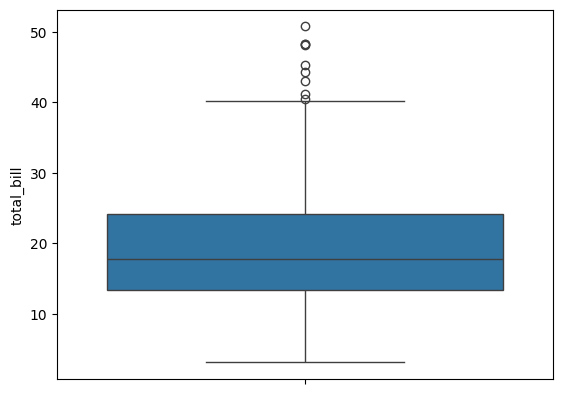

In [ ]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

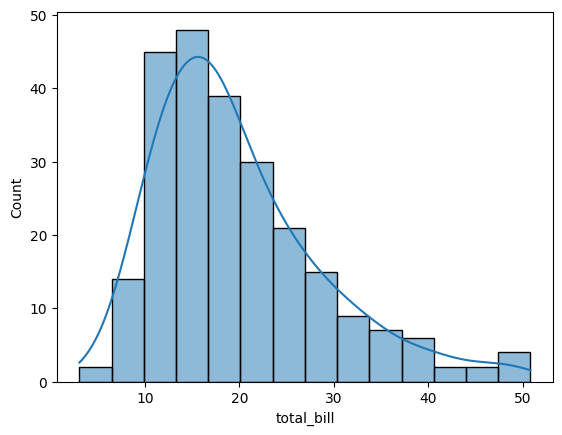

In [ ]:
sns.histplot(df['total_bill'], kde = True)

In [ ]:
df1 = sns.load_dataset('iris')

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

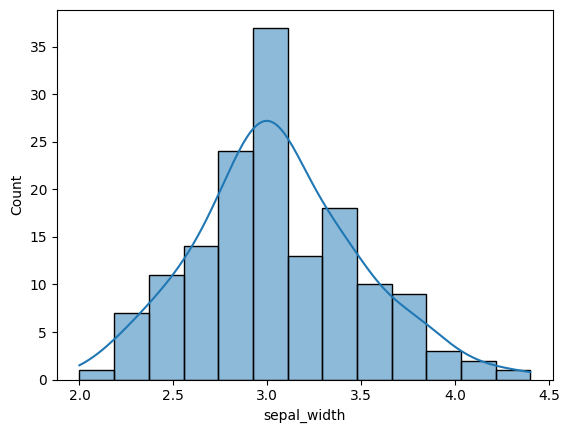

In [ ]:
sns.histplot(df1['sepal_width'], kde = True)

In [ ]:
np.percentile(df1['sepal_width'], [25, 75])

array([2.8, 3.3])

In [ ]:
 ## outliers using z_score

 outliers = []

def detect_outliers(data):
  threshold = 3 # for mormal distribution
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean) / std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [ ]:
detect_outliers(df1['sepal_width'])

[4.4]

Using IQR finding outliers

1. sort the data
2. Find Q1 and Q3
3. IQR = Q3 - Q1
4. Find the lower fence and Upper fence
5. Box plot we can see the outliers

<Axes: ylabel='sepal_width'>

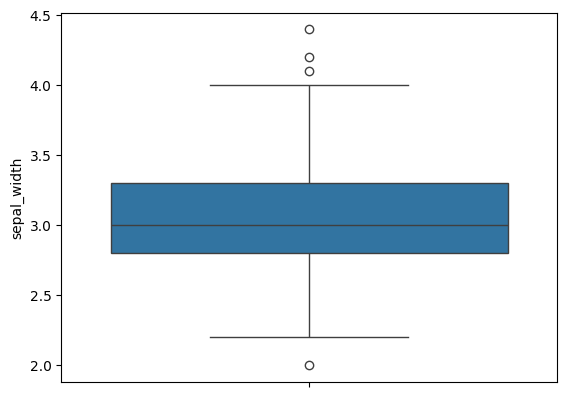

In [ ]:
sorted_dataset = sorted(df1['sepal_width'])
Q1 = np.percentile(sorted_dataset, 25)
Q3 = np.percentile(sorted_dataset, 75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
sns.boxplot(df1['sepal_width'])

In [ ]:
# Example demonstrating a z-test

# Statistics Question: A manufacturing company claims that the average weight of their product is 10 kg.
# A sample of 50 products is taken, and the sample mean is found to be 10.3 kg.
# The population standard deviation is known to be 0.5 kg.
# At a significance level of 0.05, can we reject the company's claim?

import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest

# Given data
sample_mean = 10.3
population_mean = 10
population_std = 0.5
n = 50
alpha = 0.05 # Significance level

# Perform the z-test
# The null hypothesis (H0) is that the population mean is 10 kg.
# The alternative hypothesis (H1) is that the population mean is not 10 kg.
# We use the 'value' parameter in ztest to specify the population mean under the null hypothesis.
# The 'alternative' parameter can be 'two-sided', 'larger', or 'smaller'.
# Here, we use 'two-sided' because we are checking if the mean is different from 10 (either greater or smaller).

# We need to simulate data for the z-test function
# In a real-world scenario, you would have your actual sample data.
# For this example, we will create a sample that has the given sample mean.
# The ztest function in statsmodels directly calculates the z-statistic and p-value
# based on the sample data, population standard deviation (or sample standard deviation if unknown),
# and the null hypothesis value.

# Since we are given the sample mean and population standard deviation,
# we can directly calculate the z-statistic and p-value without needing the full sample data.
# However, to use the `ztest` function, we will create a dummy sample that matches the summary statistics.
# A simpler way is to use the formula for the z-statistic and then find the p-value.

# Calculating the z-statistic manually:
z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(n))
print(f"Calculated Z-statistic: {z_statistic}")

# Calculating the p-value from the z-statistic
# For a two-sided test, the p-value is 2 * P(Z > |z_statistic|)
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(z_statistic)))
print(f"Calculated P-value: {p_value}")

# Using statsmodels.stats.weightstats.ztest for demonstration
# We need sample data for this function. Let's create a dummy sample.
# This is just for demonstration purposes to show how the function is used.
# In a real scenario, you would use your actual sample data.
# We can create a sample where the mean is 10.3 and then use the function,
# but the function will calculate the z-statistic based on the sample's std dev if not provided.
# Since we know the population std dev, using the manual calculation or a different function might be more direct.

# Let's demonstrate using ztest, assuming we had sample data `sample_data`
# For the purpose of using the function, let's create a sample array.
# Note: The ztest function is typically used with the actual sample data, not just the summary statistics.
# If you only have summary statistics, the manual calculation or other functions might be more appropriate.

# Example of how you would use the ztest function if you had sample data:
# Assuming 'sample_data' is your numpy array or pandas Series of the 50 product weights
# from statsmodels.stats.weightstats import ztest
# z_statistic_sm, p_value_sm = ztest(sample_data, value=population_mean, alternative='two-sided', ddof=0) # ddof=0 for population std dev

# Since we don't have the actual sample data, we will stick to the manual calculation which is appropriate here.

# Decision rule:
# If p-value < alpha, reject the null hypothesis.
# If p-value >= alpha, fail to reject the null hypothesis.

if p_value < alpha:
    print(f"With a p-value of {p_value:.4f} and alpha of {alpha}, we reject the null hypothesis.")
    print("Conclusion: There is enough evidence to suggest that the average weight of the product is significantly different from 10 kg.")
else:
    print(f"With a p-value of {p_value:.4f} and alpha of {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to suggest that the average weight of the product is significantly different from 10 kg.")

Calculated Z-statistic: 4.242640687119295
Calculated P-value: 2.2090496998528053e-05
With a p-value of 0.0000 and alpha of 0.05, we reject the null hypothesis.
Conclusion: There is enough evidence to suggest that the average weight of the product is significantly different from 10 kg.
